# Task 2: Predict Future Stock Prices (Short-Term)
## Problem Statement

The goal of this project is to predict the next day's closing price of a selected stock using historical market data.

I will:

Retrieve stock data using yfinance

Use Open, High, Low, Volume as features

Predict the next day's Close price

Train a Linear Regression

Compare actual vs predicted prices visually

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load Dataset

### I will use Apple (AAPL) stock.

In [4]:
# Download historical data
stock = yf.download("AAPL", start="2018-01-01", end="2024-01-01")

stock.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.304176,40.313537,39.602258,39.812835,102223600
2018-01-03,40.297150,40.839968,40.233980,40.367342,118071600
2018-01-04,40.484333,40.587282,40.262059,40.369685,89738400
2018-01-05,40.945255,41.031824,40.489009,40.580258,94640000
2018-01-08,40.793186,41.087991,40.694914,40.793186,82271200


## Data Preprocessing
## Create Target Variable (Next Day Close)

I shift the Close column upward by 1 to predict the next day's price.

In [5]:
stock["Target"] = stock["Close"].shift(-1)
stock.dropna(inplace=True)

stock.head()

Price,Close,High,Low,Open,Volume,Target
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2018-01-02,40.304176,40.313537,39.602258,39.812835,102223600,40.297150
2018-01-03,40.297150,40.839968,40.233980,40.367342,118071600,40.484333
2018-01-04,40.484333,40.587282,40.262059,40.369685,89738400,40.945255
2018-01-05,40.945255,41.031824,40.489009,40.580258,94640000,40.793186
2018-01-08,40.793186,41.087991,40.694914,40.793186,82271200,40.788502


In [6]:
features = ["Open", "High", "Low", "Volume"]
X = stock[features]
y = stock["Target"]

## Train-Test Split

I DO NOT shuffle because stock data is time-series.

In [7]:
X_train, X_test = X[:-200], X[-200:]
y_train, y_test = y[:-200], y[-200:]

## Model: Linear Regression

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_predictions = lr_model.predict(X_test)

## Model Evaluation

In [14]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name}")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("\n")

evaluate_model(y_test, lr_predictions, "Linear Regression")

Linear Regression
MAE: 1.6561077559009514
MSE: 4.9486353070550555
RMSE: 2.224552833055456
R2 Score: 0.9568118435920792




## Plot Actual vs Predicted Prices

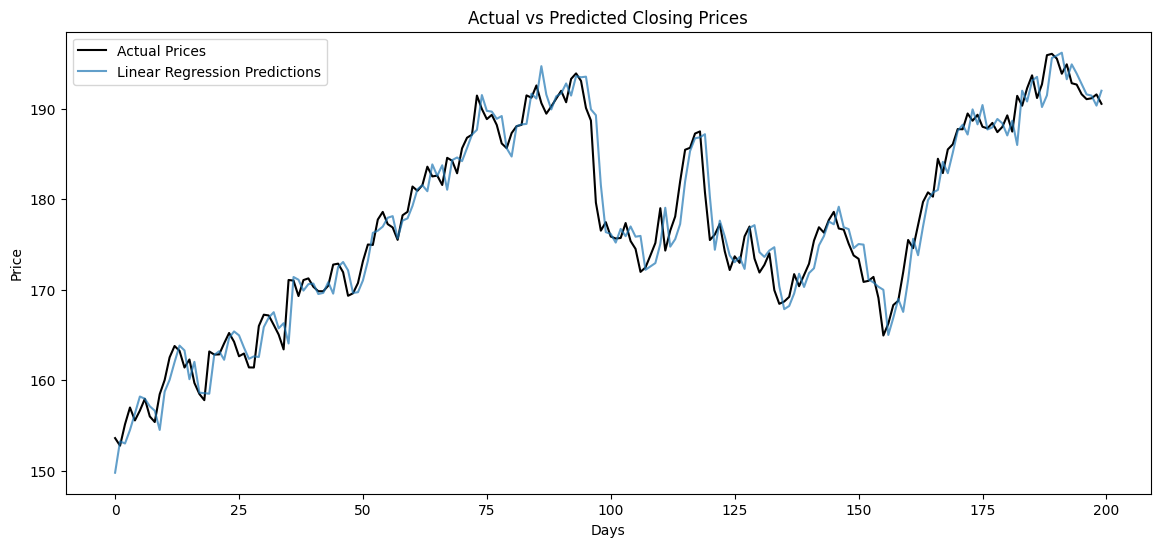

In [16]:
plt.figure(figsize=(14,6))

plt.plot(y_test.values, label="Actual Prices", color="black")
plt.plot(lr_predictions, label="Linear Regression Predictions", alpha=0.7)

plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

## Explanation
The Linear Regression model achieved a high R² score of 0.956 with low prediction errors (MAE = 1.65, RMSE = 2.22), indicating strong short-term forecasting performance. However, stock prices are highly correlated with previous values, so high accuracy does not necessarily guarantee trading profitability.